In [1]:
import os  # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys  # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path  # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

sys.path.append(code_dir)
# %load_ext autoreload
# %autoreload 2


In [2]:
from setup_module.imports import *  # type:ignore # isort:skip # fmt:skip # noqa # nopep8


Using MPS


0it [00:00, ?it/s]

<Figure size 640x480 with 0 Axes>

In [3]:
# Set Variables
site_list = ['Indeed', 'Glassdoor', 'LinkedIn']
nan_list = [None, 'None', '', ' ', [], -1, '-1', 0, '0', 'nan', np.nan, 'Nan']
pattern = r'[\n]+|[,]{2,}|[|]{2,}|[\n\r]+|(?<=[a-z]\.)(?=\s*[A-Z])|(?=\:+[A-Z])'
alpha = 0.050
normality_tests_labels = ['Statistic', 'p-value']
ngrams_list=[1, 2, 3, 123]
embedding_libraries_list = ['spacy', 'nltk', 'gensim']
ivs = ['Gender', 'Age']
ivs_all = [
    'Gender',
    'Gender_Num',
    'Gender_Female',
    'Gender_Mixed',
    'Gender_Male',
    'Gender_Female_n',
    'Gender_Male_n',
    'Gender_Female_% per Sector'
    'Gender_Male_% per Sector',
    'Age',
    'Age_Num',
    'Age_Older',
    'Age_Mixed',
    'Age_Younger',
    'Age_Older_n',
    'Age_Younger_n',
    'Age_Older_% per Sector',
    'Age_Younger_% per Sector',
]
ivs_count = [
    'Gender_Female_n',
    'Gender_Male_n',
    'Age_Older_n',
    'Age_Younger_n',
]
ivs_gender_count = [
    'Gender_Female_n',
    'Gender_Male_n',
]
ivs_age_count = [
    'Age_Older_n',
    'Age_Younger_n',
]
ivs_perc = [
    'Gender_Female_% per Sector'
    'Gender_Male_% per Sector',
    'Age_Older_% per Sector',
    'Age_Younger_% per Sector',
]
ivs_gender_perc = [
    'Gender_Female_% per Sector'
    'Gender_Male_% per Sector',
]
ivs_age_perc = [
    'Age_Older_% per Sector',
    'Age_Younger_% per Sector',
]
ivs_all_dummy_num = [
    'Gender_Num',
    'Gender_Female',
    'Gender_Mixed',
    'Gender_Male',
    'Age_Num',
    'Age_Older',
    'Age_Mixed',
    'Age_Younger',
]
ivs_all_dummy = [
    'Gender_Female',
    'Gender_Mixed',
    'Gender_Male',
    'Age_Older',
    'Age_Mixed',
    'Age_Younger',
]
ivs_gender_dummy_num = [
    'Gender_Num',
    'Gender_Female',
    'Gender_Mixed',
    'Gender_Male',
]
ivs_gender_dummy = [
    'Gender_Female',
    'Gender_Mixed',
    'Gender_Male',
]
ivs_age_dummy_num = [
    'Age_Num',
    'Age_Older',
    'Age_Mixed',
    'Age_Younger',
]
ivs_age_dummy_num = [
    'Age_Older',
    'Age_Mixed',
    'Age_Younger',
]
gender_order = ['Female', 'Mixed Gender', 'Male']
age_order = ['Older', 'Mixed Age', 'Younger']
platform_order = ['LinkedIn', 'Indeed', 'Glassdoor']
ivs_dict = {'Gender': gender_order, 'Age': age_order}
dvs = [
    'Warmth', 'Competence'
]
dvs_all = [
    'Warmth', 'Competence', 'Warmth_Probability', 'Competence_Probability'
]
dvs_prob = [
    'Warmth_Probability', 'Competence_Probability'
]

cat_list = [
    'Job ID',
    'Gender',
    'Gender_Female',
    'Gender_Male',
    'Gender_Mixed',
    'Age',
    'Age_Older',
    'Age_Younger',
    'Gender_Mixed',
    'Language',
    'English Requirement',
    'Dutch Requirement'
]

# Plotting variables
pp = pprint.PrettyPrinter(indent=4)
tqdm.tqdm.pandas(desc='progress-bar')
tqdm_auto.tqdm.pandas(desc='progress-bar')
# tqdm.notebook.tqdm().pandas(desc='progress-bar')
tqdm_auto.notebook_tqdm().pandas(desc='progress-bar')
# pbar = progressbar.ProgressBar(maxval=10)
mpl.style.use(f'{code_dir}/setup_module/apa.mplstyle-main/apa.mplstyle')
mpl.rcParams['text.usetex'] = False
font = {'family': 'arial', 'weight': 'normal', 'size': 10}
mpl.rc('font', **font)
plt.style.use('tableau-colorblind10')
plt.set_cmap('Blues')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 5000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', '{:.2f}'.format)


0it [00:00, ?it/s]

<Figure size 640x480 with 0 Axes>

# Functions

### READ DATA

In [4]:
with open(f'{data_dir}df_manual_len.txt', 'rb') as f:
    df_manual_len = int(pickle.load(f))

df_manual = pd.read_pickle(f'{df_save_dir}df_manual_for_trainning.pkl').reset_index(drop=True)
assert len(df_manual) == df_manual_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_manual_len} BUT IS OF LENGTH {len(df_manual)}'


# Analysis

## ANOVA

In [5]:
dataframes = {
    'df_manual': df_manual,
    # 'df_jobs': df_jobs,
}

In [ ]:
for df_name, df in dataframes.items():

    print('+'*120)
    print(f'====== RESULTS FOR {df_name} ======')
    if df_name == 'df_jobs':
        dvs = dvs_prob

    for iv, dv in tqdm_product(ivs, dvs):
        print('+'*120)
        print(f'Dependent Variable: {dv}\nIndependent Variable: {iv}')
        print('+'*120)

        # FREQUENCIES
        print('\n')
        print('-' * 20)
        print('FREQUENCIES')
        print(f'IVs: {iv}')
        freq_iv=rp.summary_cat(df[[iv]]).round(3)
        print(freq_iv)
        freq_iv.to_csv(f'{table_save_path}frequencies {df_name} - {iv}.csv')
        print('-' * 20)
        print('\n')
        print('-' * 20)
        print(f'DVs: {dv}')
        freq_dv=rp.summary_cont(df[[dv]]).round(3)
        print(freq_dv)
        freq_dv.to_csv(f'{table_save_path}frequencies {df_name} - {dv}.csv')
        qq_plot = pg.qqplot(df[dv], dist='norm')
        plt.ion()
        plt.show()
        print('-' * 20)
        print('\n')

        # Test of Normality
        norm = scipy.stats.normaltest(df[dv])

        print('='*80)
        print(f'{dv} Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Skewness-Kurtosis Test of Normality
        norm_sk = scipy.stats.kurtosistest(df[dv])

        print('='*80)
        print(f'{dv} Skewness-Kurtosis Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_sk)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Shapir-Wilk Test of Normality
        norm_res = scipy.stats.shapiro(df[dv])

        print('='*80)
        print(f'{dv} Shapir-Wilk Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_res)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Anderson-Darling Test of Normality
        norm_and = scipy.stats.anderson(df[dv])

        print('='*80)
        print(f'{dv} Anderson-Darling Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_and)).items():
            print(key,': ', val) # Significant
        print('\n')

        # NORMALITY TESTS
        print('NORMALITY TEST')
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        norm = pg.normality(data=df, dv=dv, group=iv).round(3)
        normal = bool(norm['normal'].to_string(index=False))
        print(f"{iv} x {dv} Normality test:\n{norm}")
        norm.to_csv(f"{table_save_path}normality {df_name} - {iv} x {dv}.csv")
        print('~' * 20)
        print('\n')

        # ANOVA SPHERICITY TEST
        print('SPHERICITY TEST')
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        spher_all = pg.sphericity(data=df, dv=dv, within=iv, method='mauchly')
        spher, test_stat, chisq, dof, pval = spher_all
        print('-' * 20)
        print(f"{iv} x {dv} Sphericity test:\n{spher} at p-value: {round(pval, 3)}, chi-square: {round(chisq, 3)}, degrees of freedom: {round(dof)}, Test statistic: {round(test_stat)}") # if p-value < 0.05, then the data are not spherically distributed = Multivariate analysis
        # spher.to_csv(f"{table_save_path}sphericity {df_name} - {iv} x {dv}.csv")
        print('~' * 20)
        print('\n')

        # LEVENE'S TESTS
        print("LEVENE'S TEST")
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        levene = pg.homoscedasticity(data=df, dv=dv, group=iv, method='levene').round(3) #dv
        equal_var_levene = bool(levene['equal_var'].to_string(index=False))
        print(f"{iv} x {dv} Levene's test:\n{levene}")
        levene.to_csv(f"{table_save_path}levene's {df_name} - {iv} x {dv}.csv")
        print('~' * 20)
        print('\n')

        # BARTLETTS TESTS
        print("BARTLETT'S TEST")
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        bartlett = pg.homoscedasticity(data=df, dv=dv, group=iv, method='bartlett').round(3) #dv
        equal_var_bartlett = bool(bartlett['equal_var'].to_string(index=False))
        print(f"{iv} x {dv} Bartlett's test:\n{bartlett}")
        bartlett.to_csv(f"{table_save_path}bartlett's {df_name} - {iv} x {dv}.csv")
        print('~' * 20)
        print('\n')

        # SCIPY ANOVAS
        print('ANOVA SIGNIFICANCE')
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        f_statistic, p_value = stats.f_oneway(
            df[dv][df[iv] == ivs_dict[iv][0]],
            df[dv][df[iv] == ivs_dict[iv][1]],
            df[dv][df[iv] == ivs_dict[iv][2]]
        )
        reject_H0 = p_value < alpha
        print('-' * 20)
        print(f'One-way ANOVA p-value: {p_value}. Rejected: {reject_H0}')
        print('~' * 20)

        # SUMMARY ANOVAS
        print('SUMMARY ANOVA')
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        summary_aova = rp.summary_cont(df[dv].groupby(df[iv]), conf=0.95, decimals=3)
        print(summary_aova)
        summary_aova.to_csv(f'{table_save_path}summary anova {df_name} - {iv} x {dv}.csv')
        print('~' * 20)
        print('\n')

        # INTERACTION MODEL
        print(f'INTEACTION ANOVA {dv}')
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        formula = f'{dv} ~ C({ivs[0]}, Treatment("{ivs_dict[ivs[0]][0]}")) + C({ivs[1]}, Treatment("{ivs_dict[ivs[1]][0]}")) + C({ivs[0]}, Treatment("{ivs_dict[ivs[0]][0]}")):C({ivs[1]}, Treatment("{ivs_dict[ivs[1]][0]}"))'
        model = ols(data = df, formula = formula).fit()
        anova_interaction_model = sm.stats.anova_lm(model, typ=2).round(3)
        print(model.summary())
        print(f"{iv} x {dv} ANOVA interaction model:\n{anova_interaction_model}")
        print('~' * 20)
        print('\n')

        if equal_var_levene is False:
            # ONE-WAY ANOVA
            print('ONE-WAY ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova = pg.anova(data=df, dv=dv, between=iv, detailed=True).round(3)
            pg.print_table(anova)
            anova.to_csv(f'{table_save_path}one-way anova {df_name} - {iv} x {dv}.')
            print('~' * 20)
            print('\n')

            # TWO-WAY ANOVA
            print('ONE-WAY ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova = pg.anova(data=df, dv=dv, between=ivs, detailed=True).round(3)
            pg.print_table(anova)
            anova.to_csv(f'{table_save_path}two-way anova {df_name} - {ivs[0]} and {ivs[1]} x {dv}.csv')
            print('~' * 20)
            print('\n')

            # INTERACTION ANOVA
            print('INTERACTION ONE-WAY ANOVA')
            print('\n')
            print('~' * 20)
            print(f'Interaction: {ivs[0]} and {ivs[1]} x {dv}')
            anova_interaction = pg.anova(data=df, dv=dv, between=ivs, detailed=True).round(3)
            pg.print_table(anova_interaction)
            anova_interaction.to_csv(f'{table_save_path}interaction one-way anova {df_name} - {ivs} x {dv}.csv')
            print('~' * 20)
            print('\n')

            # TUKEY POST HOC
            print('POST HOC GAMES HOWELL ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova_pairwise_tukey = pg.pairwise_tukey(
                data=df, dv=dv, between=iv, effsize='eta-square'
            ).round(3)
            pg.print_table(anova_pairwise_tukey)
            anova_pairwise_tukey.to_csv(f'{table_save_path}post hoc tukey {df_name} - {iv} x {dv}.csv')
            print('~' * 20)
            print('\n')

        if equal_var_levene is True:
            # WELCH ANOVA
            print('WELCH ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova_welch = pg.welch_anova(data=df, dv=dv, between=iv).round(3)
            pg.print_table(anova_welch)
            anova_welch.to_csv(f'{table_save_path}welch anova {df_name} - {iv} x {dv}.csv')
            print('~' * 20)
            print('\n')

            # KRUSKAL-WALLIS ANOVA
            print('KRUSKAL-WALLIS ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova_kruskal = pg.kruskal(data=df, dv=dv, between=iv).round(3)
            pg.print_table(anova_kruskal)
            anova_kruskal.to_csv(f'{table_save_path}kruskal-wallis anova {df_name} - {iv} x {dv}.csv')
            print('~' * 20)
            print('\n')

            # INTERACTION ANOVA
            print('INTERACTION ONE-WAY ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{ivs[0]} and {ivs[1]} x {dv}')
            anova_interaction = pg.anova(data=df, dv=dv, between=ivs, detailed=True).round(3)
            pg.print_table(anova_interaction)
            anova_interaction.to_csv(f'{table_save_path}interaction one-way anova {df_name} - {ivs} x {dv}.csv')
            print('~' * 20)
            print('\n')

            # GAMES HOWELL POST HOC
            print('POST HOC GAMES HOWELL ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova_games_posthoc = pg.pairwise_gameshowell(
                data=df, dv=dv, between=iv, effsize='eta-square'
            ).round(3)
            pg.print_table(anova_games_posthoc)
            anova_games_posthoc.to_csv(f'{table_save_path}post hoc gameshowell {df_name} - {iv} x {dv}.csv')
            print('~' * 20)
            print('\n')
            print('+'*120)
            print('\n')


# Regressions

## Logistic Regression

In [ ]:
for iv, dv in tqdm_product(ivs, dvs):
    formula = f'{dv} ~ C({ivs[0]}, Treatment("{ivs_dict[ivs[0]][0]}"))'
    # formula = f'{dv} ~ C({iv}, Treatment("{ivs_dict[iv][0]}")) + C({iv}, Treatment("{ivs_dict[iv][0]}")):C({iv}, Treatment("{ivs_dict[iv][0]}"))'
    model = sm.Logit(data = df, formula = formula).fit()

In [ ]:
for df_name, df in dataframes.items():

    if df_name == 'df_jobs':
        dvs = [
            f'{dv}_Probability'
            for dv in dvs
        ]
    for dv in dvs:
        print('+'*120)
        print(f'Dependent Variable {dv}:')
        print('+'*120)

        x = sm.add_constant(df[ivs_all_dummy].values.reshape(-1, 1))
        model = sm.Logit(df[dv].values.reshape(-1, 1), x)
        results = model.fit()

        # display results
        print('~'*20)
        print(f'SUMMARY RESULTS:\n{results.summary()}')
        print(results.summary())
        print('~'*20)
        # print(f'y = {results.params.const:.2f} + {results.params.x:.2f} * x')
        print('-'*20)
        print(f'AIC: {results.aic:.2f}'.format(results.aic))
        print('-'*20)
        print(f'Coehn\'s F2: {results.rsquared_adj:.3f}')
        print('-'*20)


In [ ]:
sm.MNLogit(y_train,sm.add_constant(X_train))

In [ ]:
model.summary()

In [ ]:
f'{dv} ~ C({ivs[0]}, Treatment("{ivs_dict[ivs[0]][0]}")) + C({ivs[1]}, Treatment("{ivs_dict[ivs[1]][0]}")) + C({ivs[0]}, Treatment("{ivs_dict[ivs[0]][0]}")):C({ivs[1]}, Treatment("{ivs_dict[ivs[1]][0]}"))'

In [ ]:
smf.glm(
    "Target ~ Gender + HP_Imputed + DV_Age + Occ_WoE"
)

In [ ]:
results_csv = results.summary().as_csv()

In [ ]:
type(results_csv)

In [ ]:
df_summary_results = pd.DataFrame(csv.reader(results.summary().as_csv().split('\n'), delimiter=','))

In [ ]:
sm.Logit(df[dv], df[[ivs_all_dummy]])

In [ ]:
for df_name, df in dataframes.items():

    if df_name == 'df_jobs':
        dvs = [
            f'{dv}_Probability'
            for dv in dvs
        ]
    for dv, iv_dummy in tqdm_product(dvs, ivs_all_dummy):
        print('+'*120)
        print(f'Dependent Variable: {dv}\nIndependent Variable: {iv_dummy}')
        print('+'*120)

        model = sm.Logit(df[dv], df[[ivs_all_dummy]])
        results = model.fit()
        df_summary_results = pd.DataFrame(csv.reader(results.summary().as_csv().split('\n'), delimiter=','))

        # display results
        print(f'SUMMARY RESULTS:\n{results.summary()}')
        print(f'SUMMARY RESULTS2:\n{results.summary2()}')
        print(f'COEFFICIENT:\n{results.params}')
        print(f'CONFIDENCE INTERVALS:\n{results.conf_int()}')
        print(f'P-VALUES:\n{results.pvalues}')
        print(f'ODDS RATIOS:\n{np.exp(results.params)}')
        print(f'AIC:\n{results.aic:.2f}'.format(results.aic))

        # display results
        print('~'*20)
        print(f'SUMMARY RESULTS:\n{results.summary()}')
        print('~'*20)
        # print(f'y = {results.params.const:.2f} + {results.params.x:.2f} * x')
        print('-'*20)
        print(f'COEFFICIENT:\n{results.params}')
        print(f'CONFIDENCE INTERVALS:\n{results.conf_int()}')
        print(f'P-VALUES:\n{results.pvalues}')
        print(f'ODDS RATIOS:\n{np.exp(results.params)}')
        print(f'AIC:\n{results.aic:.2f}'.format(results.aic))
        print(f'Coehn\'s F2: {results.rsquared_adj:.3f}')
        print('-'*20)

        # save results
        df_summary_results.to_csv(f'{table_save_path}logistic regression {df_name} - {dv} x {iv_dummy}.csv', index=False)


## OLS Regression

In [ ]:
results.params

In [ ]:
# compute the vif for all given features
def compute_vif(df, considered_features):

    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable']!='intercept']
    return vif


In [ ]:
compute_vif(df_manual, ['Warmth', 'Competence']).sort_values('VIF', ascending=False)

In [ ]:
for dv in dvs:
    x = sm.add_constant(df['Gender_Female_% per Sector'])
    model = sm.OLS(df[dv], x)
    results = model.fit()
    print(results.summary())
    print(results.summary2())


In [ ]:
results.summary()

In [ ]:
df_manual.columns.tolist()

In [ ]:
ivs_all_dummy

In [ ]:
# df_manual[[f'{iv_dummy}_% per Sector' for iv_dummy in ivs_all_dummy if 'Mixed' not in iv_dummy]]

In [ ]:
for df_name, df in dataframes.items():

    if df_name == 'df_jobs':
        dvs = [
            f'{dv}_Probability'
            for dv in dvs
        ]
    for dv, iv_dummy in tqdm_product(dvs, ivs_all_dummy):
        if 'Mixed' not in iv_dummy:
            print('+'*120)
            print(f'Dependent Variable: {dv}\nIndependent Variable: {iv_dummy}')
            print('+'*120)

            x = sm.add_constant(df[[f'{iv_dummy}_% per Sector']])
            model = sm.OLS(df[dv], x)
            results = model.fit()

            # display results
            print('~'*20)
            print(f'SUMMARY RESULTS:\n{results.summary()}')
            print(results.summary())
            print('~'*20)
            # print(f'y = {results.params.const:.2f} + {results.params.x:.2f} * x')
            print('-'*20)
            print(f'AIC: {results.aic:.2f}'.format(results.aic))
            print('-'*20)
            print(f'Coehn\'s F2: {results.rsquared_adj:.3f}')
            print('-'*20)
            # table = sm.stats.anova_lm(results, typ=2)
            # print(table)

            # # Boxplot
            # boxplot = df.boxplot([dv], by = [ivs[0], ivs[1]],
            #                     figsize = (16, 9),
            #                     showmeans = True,
            #                     notch = True)

            # boxplot.set_xlabel('Categories')
            # boxplot.set_ylabel(dv)
            # # Creating a path to save the plot.
            # plt.ion()
            # plt.show()
            # plt.pause(.001)
            # boxplot.figure.savefig(
            #     f'{plot_save_path}Probability Boxplot - {ivs[0]} x {ivs[1]} x {dv}.{image_save_format}',
            #     format=image_save_format,
            #     dpi=3000,
            # )
            # plt.close()


## Multi-level Logistic Regression

In [ ]:
dvs_prob

In [ ]:
for df_name, df in dataframes.items():
    df['Intercept'] = 1

    print('+'*120)
    print(f'====== RESULTS FOR {df_name} ======')

    for dv in dvs:
        save_name = f'Multilevel model {df_name} - {list(iter(ivs_dict))[0]} + {list(iter(ivs_dict))[1]} x {dv}'
        endog = df[dv]
        exog0 = df[['Intercept', f'{list(iter(ivs_dict))[0]}']]
        exog1 = df[['Intercept', f'{list(iter(ivs_dict))[1]}']]

        print('='*80)
        print(f'Dependent Variable: {dv}:')
        print('='*80)
        # formula = f'dv ~ C(iv, Treatment("Reference_Category") + C(iv, Treatment("Reference_Category")'

        model = smf.mixedlm(
            formula=
            f'''{dv} ~ C({list(iter(ivs_dict))[0]}, Treatment("{ivs_dict[f'{list(iter(ivs_dict))[0]}'][0]}")) +
            C({list(iter(ivs_dict))[1]}, Treatment("{ivs_dict[f'{list(iter(ivs_dict))[1]}'][0]}"))''',
            data=df, groups=df['Job ID'].astype(str)
        ).fit()
        print(model.summary())
        df_model = pd.DataFrame(index=['Descriptives', 'Results'], columns=[f'{save_name}'])
        df_model[f'{save_name}']['Descriptives'] = model.summary().tables[0]
        df_model[f'{save_name}']['Results'] = model.summary().tables[1]

        df_model.to_csv(f'{table_save_path}{save_name.split(" model")[0].lower() + " model" + save_name.split(" model")[1]}.csv', header=True, index=True, index_label=['Index col: Descriptives and Results'])

        # Normality Tests (https://www.pythonfordatascience.org/mixed-effects-regression-python/)
        ## Residual and Kernal Density Estimate (KDE) Plot for Homoskedasticity
        fig = plt.figure(figsize = (16, 9))

        ax = sns.distplot(model.resid, hist = True, kde_kws = {"shade" : True, "lw": 1}, fit = scipy.stats.norm, kde=True, color='blue')

        ax.set_title(f"Kernal Density Estimate (KDE) Plot of Model Residuals (Blue) and Normal Distribution (Black)\n{save_name}")
        ax.set_xlabel("Residuals")
        plt.ion()
        fig.show('notebook')
        plt.pause(.001)

        # Q-Q Plot
        fig = plt.figure(figsize = (16, 9))
        ax = fig.add_subplot(111)

        qq = sm.qqplot(model.resid, dist = scipy.stats.norm, line = 's', ax = ax, color='blue', markerfacecolor='blue')
        ax.set_title(f"Q-Q Plot\n{save_name}",fontsize=15)
        ax.xaxis.get_label().set_fontsize(12)
        ax.yaxis.get_label().set_fontsize(12)
        ax.get_lines()[0].set_color('black')
        ax.get_lines()[0].set_linewidth('2')
        ax.get_lines()[1].set_color('black')
        ax.get_lines()[1].set_linewidth('2')
        plt.ion()
        fig.show('notebook')
        plt.pause(.001)

        # Test of Normality
        norm = scipy.stats.normaltest(model.resid)

        print('='*80)
        print(f'{dv} Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Skewness-Kurtosis Test of Normality
        norm_sk = scipy.stats.kurtosistest(model.resid)

        print('='*80)
        print(f'{dv} Skewness-Kurtosis Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_sk)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Shapir-Wilk Test of Normality
        norm_res = scipy.stats.shapiro(model.resid)

        print('='*80)
        print(f'{dv} Shapir-Wilk Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_res)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Anderson-Darling Test of Normality
        norm_and = scipy.stats.anderson(model.resid)

        print('='*80)
        print(f'{dv} Anderson-Darling Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_and)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Residuals versus Fitted values (RVF) Plot for Homoskedasticity
        fig = plt.figure(figsize = (16, 9))

        ax = sns.scatterplot(y = model.resid, x = model.fittedvalues, color='blue')

        ax.set_title(f"Residuals versus Fitted values (RVF) Plot\n{save_name}")
        ax.set_xlabel("Fitted Values")
        ax.set_ylabel("Residuals")
        plt.ion()
        fig.show('notebook')
        plt.pause(.001)

        # White’s Lagrange Multiplier Test for Heteroscedasticity
        het_white_res = het_white(model.resid, model.model.exog)

        het_white_labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

        print('='*80)
        print('White’s Lagrange Multiplier Test for Heteroscedasticity')
        print('-'*80)
        for key, val in dict(zip(het_white_labels, het_white_res)).items():
            print(key, val)
        print('\n')
        print('\n')
        print('+'*120)
        print('\n')


In [13]:
[x for x in df_manual.columns.tolist() if 'Job Description' not in x]

['% Sector per Workforce',
 '% per Sector',
 '% per Social Category',
 '% per Workforce',
 'Age',
 'Age_Mixed',
 'Age_Num',
 'Age_Older',
 'Age_Older_% per Sector',
 'Age_Older_% per Social Category',
 'Age_Older_% per Workforce',
 'Age_Older_n',
 'Age_Younger',
 'Age_Younger_% per Sector',
 'Age_Younger_% per Social Category',
 'Age_Younger_% per Workforce',
 'Age_Younger_n',
 'Company Name',
 'Competence',
 'Dutch Requirement',
 'English Requirement',
 'Gender',
 'Gender_Female',
 'Gender_Female_% per Sector',
 'Gender_Female_% per Social Category',
 'Gender_Female_% per Workforce',
 'Gender_Female_n',
 'Gender_Male',
 'Gender_Male_% per Sector',
 'Gender_Male_% per Social Category',
 'Gender_Male_% per Workforce',
 'Gender_Male_n',
 'Gender_Mixed',
 'Gender_Num',
 'Industry',
 'Job ID',
 'Job Title',
 'Keywords Count',
 'Location',
 'Platform',
 'Search Keyword',
 'Sector',
 'Sector Code',
 'Sector_n',
 'Warmth']

## Logistic Specification Curve Analysis

In [52]:
%%time
ivs = ['Gender', 'Age']
ivs_count = [
    'Gender_Female_n',
    'Gender_Male_n',
    'Age_Older_n',
    'Age_Younger_n',
]
ivs_perc = [
    'Gender_Female_% per Sector',
    'Gender_Male_% per Sector',
    'Age_Older_% per Sector',
    'Age_Younger_% per Sector',
]
ivs_all_dummy = [
    'Gender_Female',
    'Gender_Mixed',
    'Gender_Male',
    'Age_Older',
    'Age_Mixed',
    'Age_Younger',
]
dvs = [
    'Warmth', 'Competence'
]
dvs_prob = [
    'Warmth_Probability', 'Competence_Probability',
]
controls = [
        '% Sector per Workforce',
        'English Requirement', 'Dutch Requirement',
        'Job Description num_words',
        # 'Job Description num_unique_words',
        # 'Job Description num_chars',
        # 'Job Description num_chars_no_whitespact_and_punt',
        # 'Industry', 'Sector_n', 
        'Platform_LinkedIn', 'Platform_Indeed', 'Platform_Glassdoor',
    ]
for df_name, df in dataframes.items():

    df.columns

    print(f'====== RESULTS FOR {df_name} ======')

    x_exog = ivs_perc

    # y_endog_1 = 'Warmth'
    # y_endog_2 = 'Competence'

    y_endog = dvs

    

    # n_grams_counts = []
    # for embedding_library, ngram_num in tqdm_product(embedding_libraries_list, ngrams_list):
    #     controls.extend(
    #         [
    #             f'Job Description {embedding_library}_{ngram_num}grams_count',
    #             f'Job Description {embedding_library}_{ngram_num}grams_abs_word_freq',
    #             f'Job Description {embedding_library}_{ngram_num}grams_abs_word_perc',
    #             f'Job Description {embedding_library}_{ngram_num}grams_abs_word_perc_cum'
    #         ]
    #     )

    sc = specy.SpecificationCurve(df, dvs, ivs_perc, controls)
    sc.fit(estimator=sm.Logit)


====== RESULTS FOR df_manual ======
         Current function value: 0.565514
         Iterations: 35
         Current function value: 0.565514
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_r

         Current function value: 0.565514
         Iterations: 35
         Current function value: 0.535217
         Iterations: 35
         Current function value: 0.565191
         Iterations: 35
         Current function value: 0.565514
         Iterations: 35
         Current function value: 0.565514
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_r

         Current function value: 0.535217
         Iterations: 35
         Current function value: 0.565191
         Iterations: 35
         Current function value: 0.565514
         Iterations: 35
         Current function value: 0.535217
         Iterations: 35
         Current function value: 0.565191
         Iterations: 35
         Current function value: 0.565514
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.534975
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_r

         Current function value: 0.535217
         Iterations: 35
         Current function value: 0.565191
         Iterations: 35
         Current function value: 0.535217
         Iterations: 35
         Current function value: 0.565191
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_r

         Current function value: 0.565514
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.534975
         Iterations 6
         Current function value: 0.535217
         Iterations: 35
         Current function value: 0.565191
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.534975
         Iterations 6
         Current function value: 0.535217
         Iterations: 35
         Current function value: 0.565191
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.534975
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_r

Optimization terminated successfully.
         Current function value: 0.534975
         Iterations 6
         Current function value: 0.535217
         Iterations: 35
         Current function value: 0.565191
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.534975
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.534975
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.534975
         Iterations 6
         Current function value: 0.565510
         Iterations: 35
         Current function value: 0.565510
         Iterations: 35
         Current function value: 0.565510
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.535213
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.565187
         Iterations 6
         Current function value: 0.565510
         Iterations: 35
         Current function value: 0.565510
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.535213
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.565187
         Iterations 6
         Current function value: 0.565510
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.535213
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.565187
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.565510
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.534971
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.535213
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.565187
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.535213
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.565187
         Iterations 6
         Current function value: 0.565510
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.534971
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.535213
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.565187
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.534971
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.535213
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.565187
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.534971
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.534971
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.535213
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.565187
  

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_r

Optimization terminated successfully.
         Current function value: 0.643222
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689032
         Iterations 7
         Current function value: 0.689516
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.642838
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.643222
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689032
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.643222
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689032
         Iterations 7
         Current function value: 0.689516
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.642838
         Iterations 11
Optimization terminated successfully.
         Cur

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.689032
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.642838
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.642838
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.643222
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689032
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.642838
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.642838
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.642838
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.689518
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.689

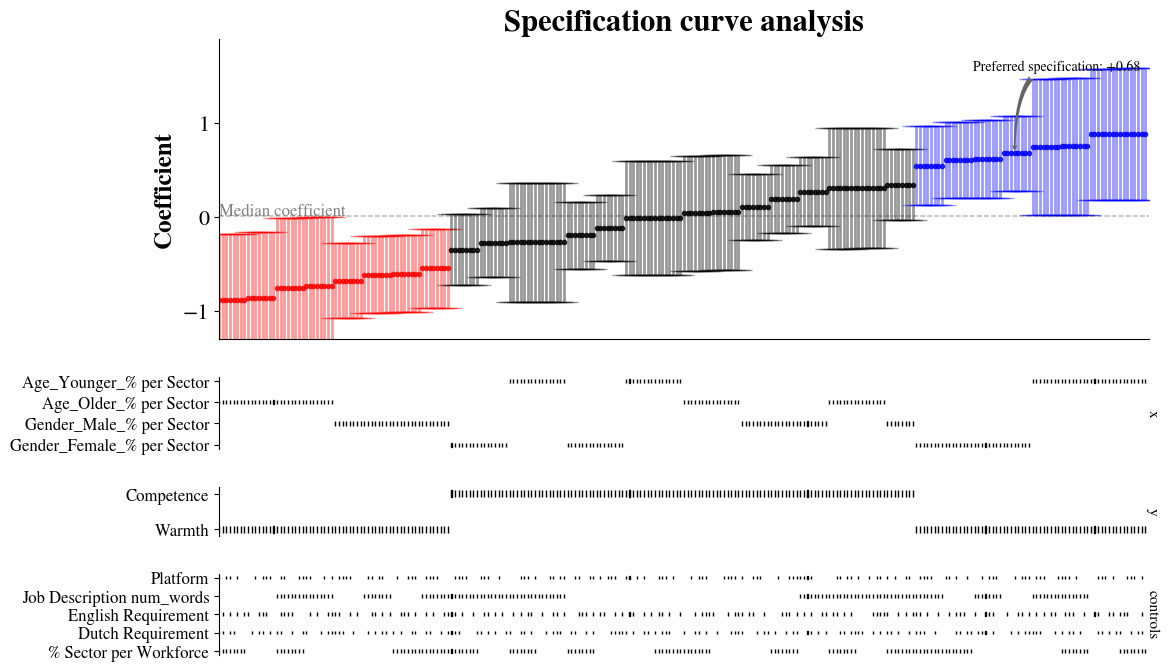

In [55]:
sc.plot(preferred_spec=['Gender_Female_% per Sector', 'Warmth', 'Platform'])


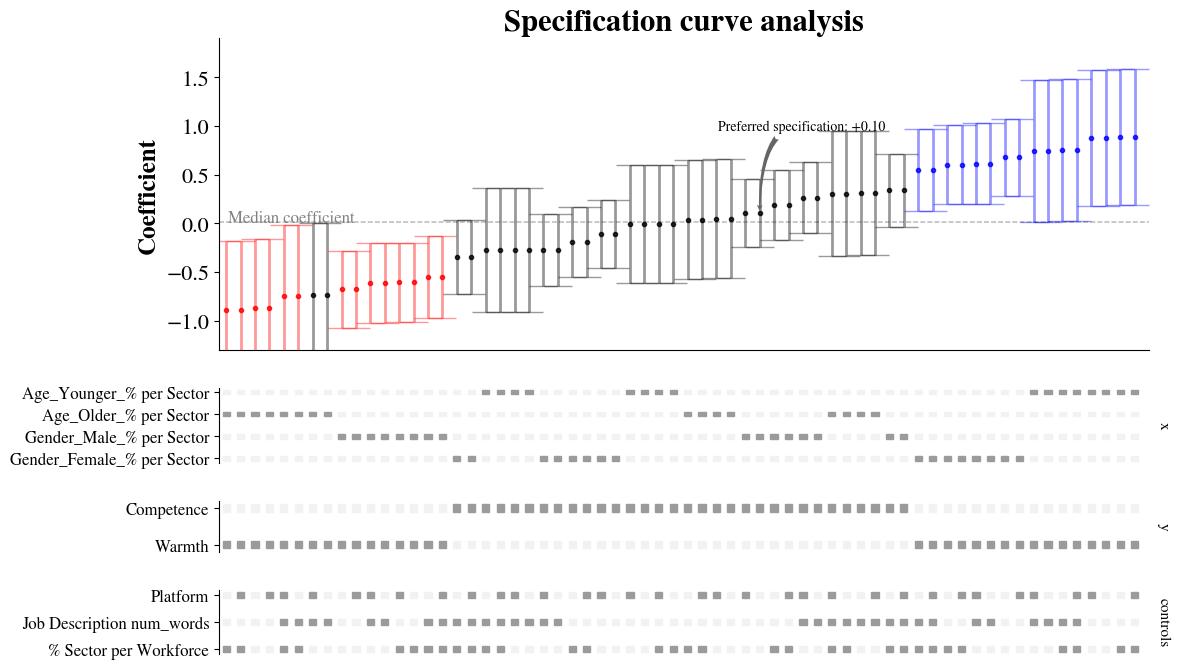

In [29]:
sc.plot(preferred_spec=['Gender_Male_% per Sector', 'Competence'])


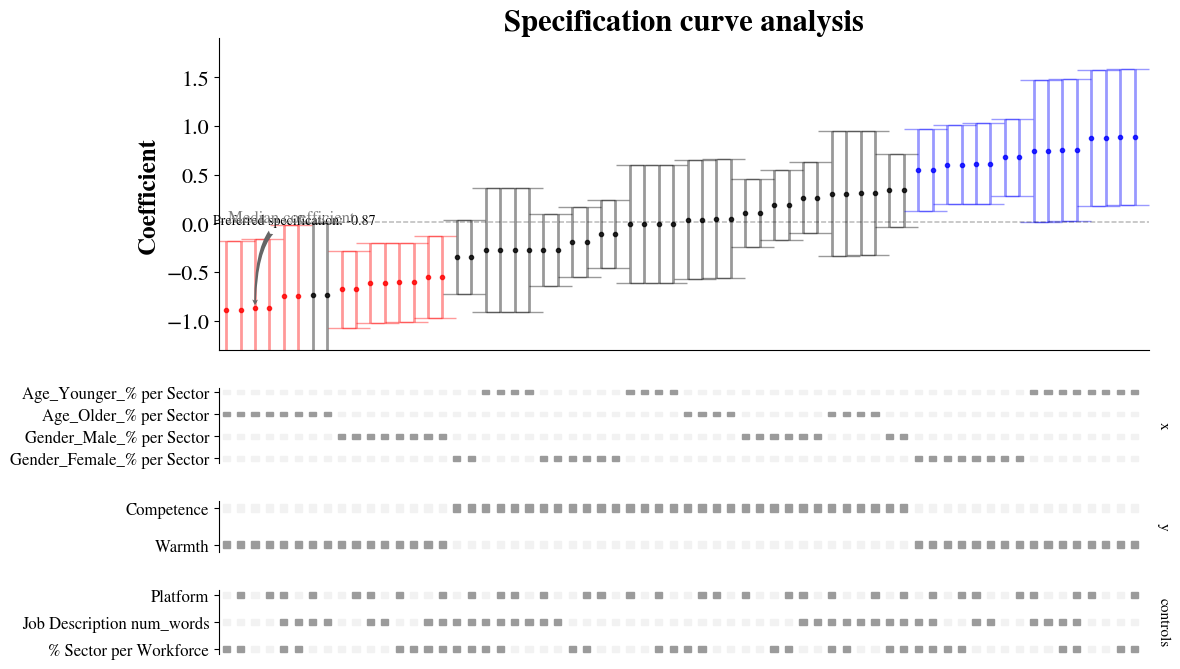

In [30]:
sc.plot(preferred_spec=['Age_Older_% per Sector', 'Warmth'])


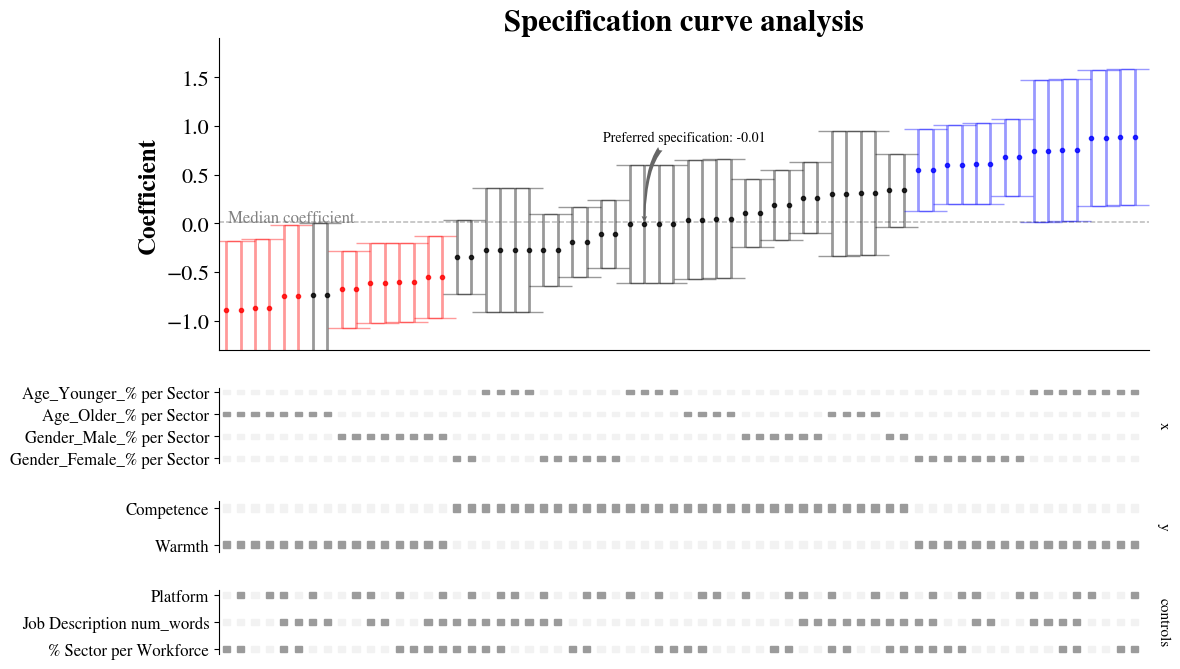

In [31]:
sc.plot(preferred_spec=['Age_Younger_% per Sector', 'Competence'])


In [32]:
sc.df_r.head()

,x_exog,y_endog,Results,Coefficient,Specification,bse,conf_int,pvalues,SpecificationCounts,preferred,color_coeff,coeff_pvals
Specification No.,,,,,,,,,,,,
0,Age_Older_% per Sector,Warmth,<statsmodels.discrete.discrete_model.BinaryRes...,-0.89,"[% Sector per Workforce, Age_Older_% per Secto...",0.36,"[-1.5981539069504143, -0.17741102090432148]",{'Age_Older_% per Sector': 0.01430732728016365...,"{'% Sector per Workforce': 1, 'Age_Older_% per...",False,red,0.01
1,Age_Older_% per Sector,Warmth,<statsmodels.discrete.discrete_model.BinaryRes...,-0.89,"[% Sector per Workforce, Age_Older_% per Secto...",0.36,"[-1.5981539069504143, -0.17741102090432148]",{'Age_Older_% per Sector': 0.01430732728016365...,"{'% Sector per Workforce': 1, 'Age_Older_% per...",False,red,0.01
2,Age_Older_% per Sector,Warmth,<statsmodels.discrete.discrete_model.BinaryRes...,-0.87,"[Age_Older_% per Sector, Warmth]",0.36,"[-1.5752324609049224, -0.1599847896319031]",{'Age_Older_% per Sector': 0.01625731803526885...,"{'Age_Older_% per Sector': 1, 'Warmth': 1}",False,red,0.02
3,Age_Older_% per Sector,Warmth,<statsmodels.discrete.discrete_model.BinaryRes...,-0.87,"[Age_Older_% per Sector, Platform, Warmth]",0.36,"[-1.5752324609049224, -0.1599847896319031]",{'Age_Older_% per Sector': 0.01625731803526885...,"{'Age_Older_% per Sector': 1, 'Platform': 1, '...",False,red,0.02
4,Age_Older_% per Sector,Warmth,<statsmodels.discrete.discrete_model.BinaryRes...,-0.75,"[% Sector per Workforce, Age_Older_% per Secto...",0.38,"[-1.4862876848883841, -0.013730736623388196]",{'Age_Older_% per Sector': 0.04587789123268048...,"{'% Sector per Workforce': 1, 'Age_Older_% per...",False,red,0.05


In [56]:
female_log_models = sc.df_r['Results'].loc[sc.df_r['Specification'].apply(lambda x: ' '.join(x)).str.contains('English Requirement')]

In [57]:
for model in female_log_models:
    print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                 Warmth   No. Observations:                 5367
Model:                          Logit   Df Residuals:                     5359
Method:                           MLE   Df Model:                            7
Date:                Thu, 06 Apr 2023   Pseudo R-squ.:                0.002533
Time:                        18:37:47   Log-Likelihood:                -3034.5
converged:                       True   LL-Null:                       -3042.3
Covariance Type:            nonrobust   LLR p-value:                   0.03104
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age_Older_% per Sector     -0.8890      0.362     -2.453      0.014      -1.600      -0.179
% Sector per Workforce      1.3730      0.535      2.567      0.010       0.325       2.422


In [22]:
df_coeff_p = sc.df_r.loc[sc.df_r['coeff_pvals'] < 0.05].sort_values(by=['Coefficient'], ascending=False)[['Specification', 'Coefficient', 'coeff_pvals']].head(10)

In [23]:
df_coeff_p

,Specification,Coefficient,coeff_pvals
Specification No.,,,
1023,"[Age_Younger_% per Sector, Dutch Requirement, ...",0.91,0.01
1015,"[Age_Younger_% per Sector, English Requirement...",0.91,0.01
1008,"[Age_Younger_% per Sector, English Requirement...",0.91,0.01
1009,"[Age_Younger_% per Sector, Dutch Requirement, ...",0.91,0.01
1010,"[Age_Younger_% per Sector, Dutch Requirement, ...",0.91,0.01
1011,"[Age_Younger_% per Sector, Sector_n, Warmth]",0.91,0.01
1013,"[Age_Younger_% per Sector, Dutch Requirement, ...",0.91,0.01
1014,"[Age_Younger_% per Sector, Dutch Requirement, ...",0.91,0.01
1012,"[Age_Younger_% per Sector, Dutch Requirement, ...",0.91,0.01
